In [1]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

United States has been a country that a lot of people would like to develop their career in. There are a lot of great job opportunities in United States. Particularly for students like us, attending the computer science bootcamp, we are also finding an opportunity for career transition. However, do we really know what are we looking for? What is the dream job that gets highly paid and has the higher rate of employment? Is the Computer Science really a dream job for everyone? 

To figure out the quesitons, I analyzed the data  from the Occupational Employment Statistics (OES) program offered by Bureau Labor of Statistics[1]. The following will take a preliminary look at the provided data including the meaning of each feature, the basics of how the data was collected, as well as the collecting methodologies.

[1]: The data is retrieved from a program conducted by Bureau Labor of Statistics. The Occupational Employment Statistics (OES) program conducts a semiannual mail survey designed to produce estimates of employment and wages for specific occupations. The OES program collects data on wage and salary workers in nonfarm establishments in order to produce employment and wage estimates for about 800 occupations.  Surveys collect data for the payroll period including the 12th day of May or November. Data from self-employed persons are not collected and are not included in the estimates.

Reference: Bureau Labor of Statistics, https://www.bls.gov/oes/oes_emp.htm#overview

In [28]:
jobs = pd.read_csv('occupations.csv')
jobs

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",00-0000,All Occupations,total,"5,783,690",0.4,1000.000,1.00,...,19.08,32.89,52.04,"21,190","25,180","39,680","68,420","108,250",NaN,NaN
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management Occupations,major,"330,970",1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
2,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1011,Chief Executives,detailed,"11,400",4.9,1.971,1.24,...,#,#,#,"96,150","151,770",#,#,#,NaN,NaN
3,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1021,General and Operations Managers,detailed,"99,260",1.5,17.163,1.10,...,55.15,86.76,#,"49,290","73,820","114,720","180,470",#,NaN,NaN
4,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1031,Legislators,detailed,690,6.9,0.119,0.31,...,*,*,*,"42,920","52,880","63,270","90,380","111,850",True,NaN
5,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-2011,Advertising and Promotions Managers,detailed,"1,720",14.1,0.297,1.44,...,48.55,70.42,#,"41,880","64,930","100,980","146,470",#,NaN,NaN
6,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-2021,Marketing Managers,detailed,"10,550",3.6,1.824,1.24,...,65.39,88.29,#,"69,420","93,530","136,000","183,650",#,NaN,NaN
7,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-2022,Sales Managers,detailed,"27,110",2.9,4.688,1.80,...,53.46,79.76,#,"45,180","68,400","111,200","165,900",#,NaN,NaN
8,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-2031,Public Relations and Fundraising Managers,detailed,"2,410",8.2,0.416,0.91,...,58.55,75.66,98.11,"67,700","91,650","121,790","157,370","204,060",NaN,NaN
9,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-3011,Administrative Services Managers,detailed,"15,860",3.1,2.742,1.45,...,47.59,62.25,79.63,"56,650","72,840","98,980","129,480","165,640",NaN,NaN


Currently, all missing values are recorded as a star (*). Also, the number are presented as strings, and some of them have a comma within numbers. As a result, I will convert them to float and use NaN to replace unknown data. Because I'll use the data of annual average income (A_MEAN) and hourly average income (H_MEAN) to do some calculation, I'll delete the rows without the two data.  

Data source: https://www.bls.gov/oes/current/oes_nat.htm

# Analytic Questions
**#1 Do the field in Computer and Mathematical earn most money in metropolitan area in U.S.?**

The Computer and Mathematical field is a group of a lot of occupations (marked as major in the column of OCC_GROUP). The subgroup of the field is also included in the data. So I'll have to filter the detail items in the field. (marked as detail in the column as OCC_GROUP)  

In [2]:
#transfer the H_MEAN or A_MEAN or JOBS_1000 number from string to float
jobs['A_MEAN'] = jobs['A_MEAN'].str.replace(',', '')
jobs['TOT_EMP'] = jobs['TOT_EMP'].str.replace(',', '')
jobs['A_MEAN'] = pd.to_numeric(jobs.A_MEAN, errors='coerce')
jobs['H_MEAN'] = pd.to_numeric(jobs.H_MEAN, errors='coerce')
jobs['TOT_EMP'] = pd.to_numeric(jobs.TOT_EMP, errors='coerce')

#drop the word'Occupations' in each row of OCC_TITLE
jobs['OCC_TITLE'] = jobs['OCC_TITLE'].str.replace('Occupations', '')

#delete the rows without value
job=jobs[jobs['H_MEAN'].notnull() & jobs['A_MEAN'].notnull()]

#filter the data without'major'
major = job[job['OCC_GROUP'].str.contains('major')]
major.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN


As the data had filtered out detail items in each field of occupation, the same occupations in different area of the States should be combined. As a result, in the database of 'major', the same fields were group together, and the data of annual average income and hourly average income in different area were averaged again.[2]

[2]: Actually the value in H_MEAN and A_MEAN shouldn't be simply averaged when grouped together. The method of weighted average should be applyed because the number in each field was different. However, to make it a simple way, in this case the average was used. 

In [3]:
#caulculate the average of income per hour/year of occupations in U.S. major states
H_MEAN_all = major.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_all)
A_MEAN_all = major.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_all)

                                                    H_MEAN
OCC_TITLE                                                 
Architecture and Engineering                     43.160000
Arts, Design, Entertainment, Sports, and Media   31.148182
Building and Grounds Cleaning and Maintenance    14.767273
Business and Financial Operations                39.732727
Community and Social Service                     24.668182
Computer and Mathematical                        45.338182
Construction and Extraction                      27.202727
Education, Training, and Library                 28.680000
Farming, Fishing, and Forestry                   14.863636
Food Preparation and Serving Related             12.608182
Healthcare Practitioners and Technical           42.223636
Healthcare Support                               15.958182
Installation, Maintenance, and Repair            24.651818
Legal                                            57.131818
Life, Physical, and Social Science               37.7518

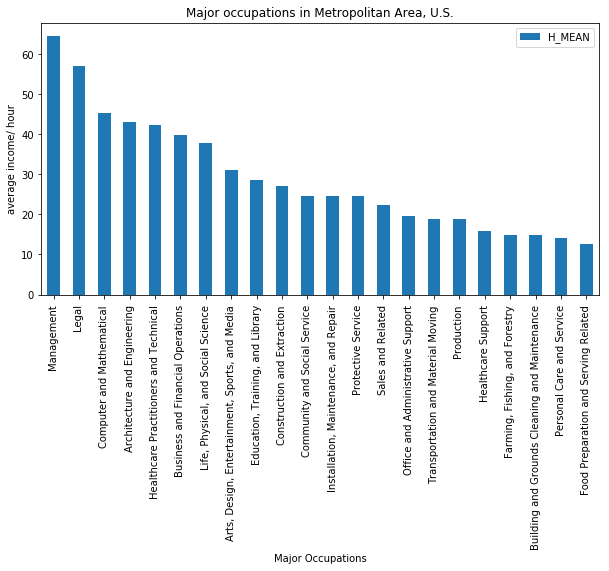

In [33]:
# sort the income in descending order, and use a bar chart
H_MEAN_all.sort_values("H_MEAN",ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('average income/ hour')
plt.xlabel('Major Occupations')
plt.title('Major occupations in Metropolitan Area, U.S.')

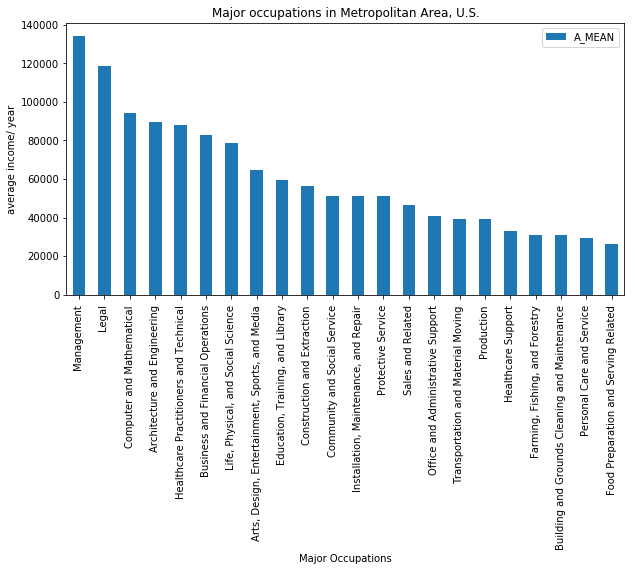

In [30]:
# sort the income in descending order, and use a bar chart
A_MEAN_all.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('Major Occupations')
plt.title('Major occupations in Metropolitan Area, U.S.')

In order to see whether the field in Computer and Mathematical earns most money in U.S.metropolitan Area, the data was presented with a bar chart and from highest to lowest. It shows that the field is the number three highest both for the average income/ year and average income/ hour. Also, the trend in each career is the same in average income/ year and hourly income/year. Management and Legal are the number one and two.

To know whether the trend is applicable in San francisco, a place famous for the field of Computer and Math, the area was narrowed down to the San Francisco.

In [6]:
#filter the data without'San Francisco, CA'
major_sub = major[major['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
major_sub.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
779,CA,41860,"San Francisco-Oakland-Hayward, CA",11-0000,Management,major,162760.0,1.3,71.917,1.42,...,64.42,91.66,#,"58,940","88,430","134,000","190,650",#,NaN,NaN
814,CA,41860,"San Francisco-Oakland-Hayward, CA",13-0000,Business and Financial Operations,major,177570.0,1.4,78.465,1.51,...,40.62,55.38,75.67,"48,850","62,970","84,480","115,190","157,390",NaN,NaN
845,CA,41860,"San Francisco-Oakland-Hayward, CA",15-0000,Computer and Mathematical,major,135380.0,2.2,59.822,2.02,...,53.52,67.93,79.43,"59,200","82,140","111,330","141,290","165,200",NaN,NaN
863,CA,41860,"San Francisco-Oakland-Hayward, CA",17-0000,Architecture and Engineering,major,52030.0,3.5,22.992,1.29,...,46.19,60.44,75.59,"53,780","70,010","96,080","125,700","157,230",NaN,NaN
896,CA,41860,"San Francisco-Oakland-Hayward, CA",19-0000,"Life, Physical, and Social Science",major,41040.0,2.6,18.134,2.21,...,41.09,57.03,73.62,"43,300","58,730","85,470","118,630","153,140",NaN,NaN


In [7]:
#caulculate the average of income per hour/year of occupations in C.A.
H_MEAN_sub = major_sub.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_sub)
A_MEAN_sub = major_sub.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_sub)

                                                 H_MEAN
OCC_TITLE                                              
Architecture and Engineering                      48.45
Arts, Design, Entertainment, Sports, and Media    34.38
Building and Grounds Cleaning and Maintenance     17.48
Business and Financial Operations                 46.32
Community and Social Service                      27.44
Computer and Mathematical                         54.04
Construction and Extraction                       32.37
Education, Training, and Library                  30.95
Farming, Fishing, and Forestry                    16.09
Food Preparation and Serving Related              14.76
Healthcare Practitioners and Technical            51.75
Healthcare Support                                19.81
Installation, Maintenance, and Repair             28.16
Legal                                             69.41
Life, Physical, and Social Science                44.95
Management                                      

['H_MEAN']


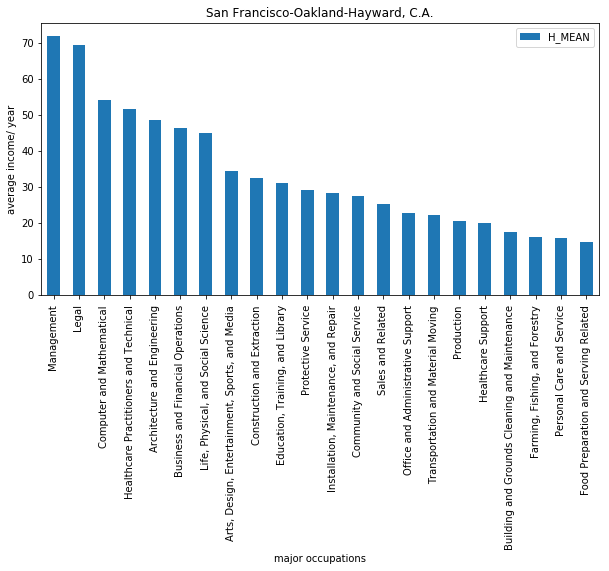

In [47]:
# sort the income in descending order, and use a bar chart
H_MEAN_sub.sort_values("H_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('major occupations')
plt.title('San Francisco-Oakland-Hayward, C.A.')

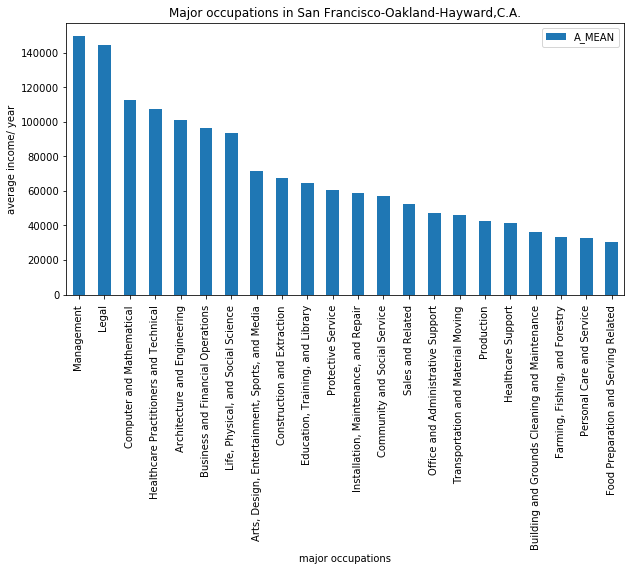

In [9]:
# sort the income in descending order, and use a bar chart
A_MEAN_sub.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('major occupations')
plt.title('Major occupations in San Francisco-Oakland-Hayward,C.A.')

Furthure analysis was done to see whether the field has the same ranking in San Francisco since I live in San Francisco and the place is well-known for the career. The result showed that the field of Computer and Mathmetics had the same ranking as in the metropolitan area in U.S. even though the hourly average income is 54.04 in SF, and the income is 45.34 amoung U.S., and the annual average income in SF is 112,410, and 94,302 amoung U.S.

**#2 Does employment rate distribute evenly among the careers?**

On top of knowing the salary of each major occupation in U.S. matropolitan areas, employment rate is also a significant index for people who want to do transition for their career. Whether the employment rate distribute evenly among the careers is a good reference for people to evaluate the talent demands is large or not in a certain occupation. To get the data of emplyment rate, I turned the number of emplyment people from string to float. Also, since the same occupation in different area will be grouped together, the emplyment rate provided cannot be used.

In [10]:
#delete the rows without value
job_TOTEMP=jobs[jobs['TOT_EMP'].notnull()]

#filter the data without'major'
major_TOTEMP = job_TOTEMP[job_TOTEMP['OCC_GROUP'].str.contains('major')]
major_TOTEMP.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN


After grouping different areas, I also turned the number of emplyment people into percentage for furthure use.

In [11]:
#caulculate the average of income per hour/year of occupations in U.S. major states
sum_TOTEMP = major_TOTEMP.groupby(['OCC_TITLE'])[['TOT_EMP']].sum()

#create a column for the percentage of TOT_EMP
EMP_PERCENTAGE = sum_TOTEMP['TOT_EMP']*100/ sum_TOTEMP['TOT_EMP'].sum()

print(sum_TOTEMP.head())
print(EMP_PERCENTAGE.head())

                                                   TOT_EMP
OCC_TITLE                                                 
Architecture and Engineering                      663360.0
Arts, Design, Entertainment, Sports, and Media    770650.0
Building and Grounds Cleaning and Maintenance    1226000.0
Business and Financial Operations                2574460.0
Community and Social Service                      578040.0
OCC_TITLE
Architecture and Engineering                       1.660589
Arts, Design, Entertainment, Sports, and Media     1.929168
Building and Grounds Cleaning and Maintenance      3.069046
Business and Financial Operations                  6.444646
Community and Social Service                       1.447008
Name: TOT_EMP, dtype: float64


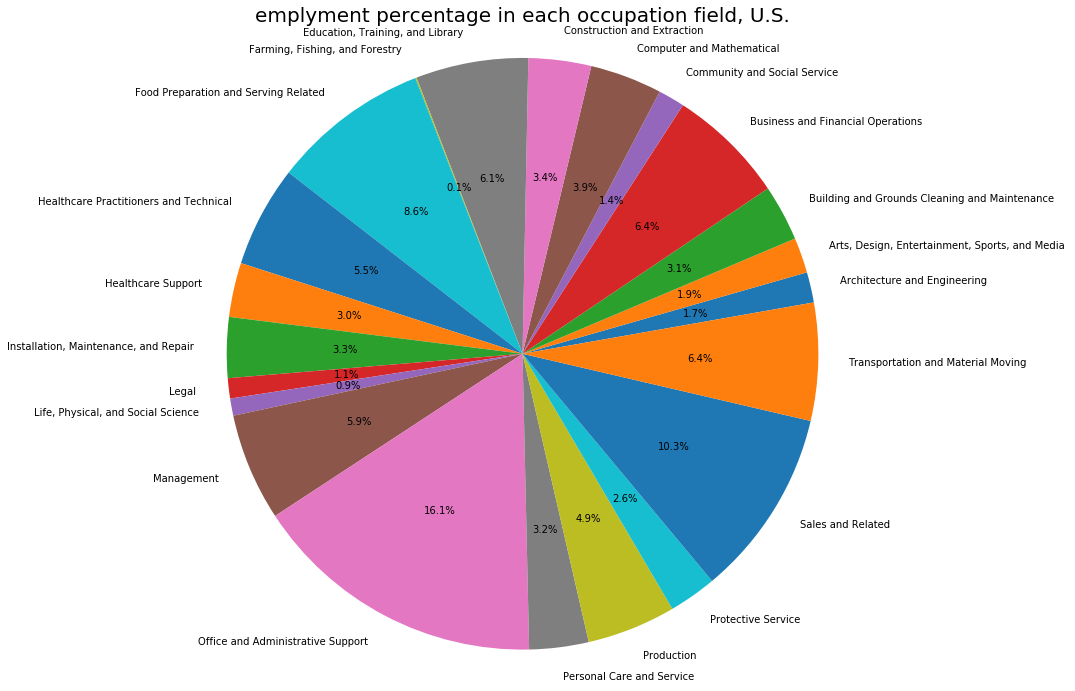

In [12]:
# Create a pie chart
# set the pie size
plt.figure(figsize=(30,12))
#Plot Video Game Sales in 1989 by Genre
plt.subplot(121)
#use the sum_TOTEMP data
plt.pie(sum_TOTEMP,
# with the labels being officer names
    labels=sum_TOTEMP.index,
    shadow=False,
# with the start angle at 10%
    startangle=10,
# with the percent listed as a fraction
    autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('emplyment percentage in each occupation field, U.S.',fontsize=20)
plt.show()

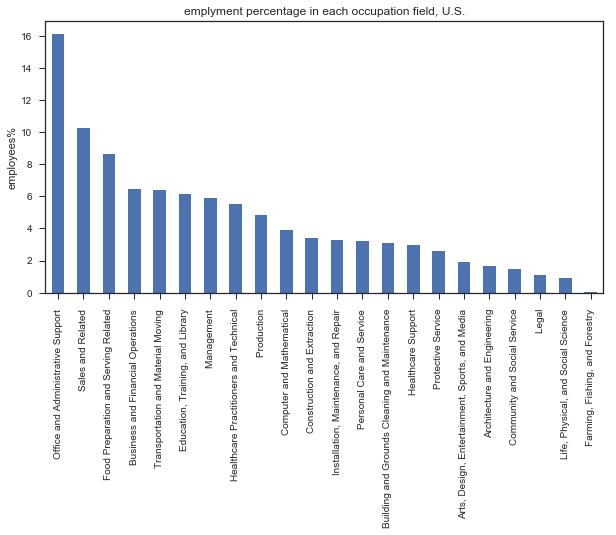

In [117]:
# use a bar chart
EMP_PERCENTAGE.sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('employees%')
plt.xlabel('')
plt.title('emplyment percentage in each occupation field, U.S.')

The result showed that each job didn't distribute evenly. In fact, the Office and Administrative Support field has the highest emplyment rate, 16.1%, with the field of Farming, Fishing and Forestry the lowest, 0.1%. What's interesting is the field of Computer and Math ranks No.10 in the emplyment rate, but the salary of the career ranks number three. It seems a promising career since both the salary and the emplyment rate are good enogh among all occupations. If we take a close look at the field of management, both the salary (ranks No.1) and emplyment rate (ranks No.7) have an exciteing data. However, as the field of management includes a huge variety of jobs, and managers are in a rather high position of each occupation, it is not that surprising.

**#3 What's the wage distrubution in each subgroup in the field of Computer and Mathematical Occupations in San Francisco?**

In [114]:
jobs = pd.read_csv('occupations.csv')

#transfer the H_MEAN or A_MEAN or JOBS_1000 number from string to float
jobs['A_PCT10'] = jobs['A_PCT10'].str.replace(',', '')
jobs['A_PCT25'] = jobs['A_PCT25'].str.replace(',', '')
jobs['A_MEDIAN'] = jobs['A_MEDIAN'].str.replace(',', '')
jobs['A_PCT75'] = jobs['A_PCT75'].str.replace(',', '')
jobs['A_PCT90'] = jobs['A_PCT90'].str.replace(',', '')
jobs['A_PCT10'] = pd.to_numeric(jobs.A_PCT10, errors='coerce')
jobs['A_PCT25'] = pd.to_numeric(jobs.A_PCT25, errors='coerce')
jobs['A_MEDIAN'] = pd.to_numeric(jobs.A_MEDIAN, errors='coerce')
jobs['A_PCT75'] = pd.to_numeric(jobs.A_PCT75, errors='coerce')
jobs['A_PCT90'] = pd.to_numeric(jobs.A_PCT90, errors='coerce')

#drop the word'Occupations' in each row of OCC_TITLE
jobs['OCC_TITLE'] = jobs['OCC_TITLE'].str.replace('Occupations', '')

#delete the rows without value
job=jobs[jobs['A_PCT10'].notnull()]

#filter the data without'major'
detail = job[job['OCC_GROUP'].str.contains('detailed')]
subCA = detail[detail['OCC_CODE'].str.contains('15-')]
sub = subCA[subCA['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
sub_new=sub.set_index('OCC_TITLE')
sub_new.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
OCC_TITLE,,,,,,,,,,,,,,,,,,,,,
Computer and Information Research Scientists,CA,41860,"San Francisco-Oakland-Hayward, CA",15-1111,detailed,900,13.1,0.399,2.11,60.36,...,58.31,73.25,88.80,75110.0,96230.0,121290.0,152370.0,184700.0,NaN,NaN
Computer Systems Analysts,CA,41860,"San Francisco-Oakland-Hayward, CA",15-1121,detailed,"18,190",6.4,8.037,1.98,53.75,...,51.44,64.61,77.98,66470.0,85380.0,107000.0,134380.0,162200.0,NaN,NaN
Information Security Analysts,CA,41860,"San Francisco-Oakland-Hayward, CA",15-1122,detailed,"2,320",18.8,1.025,1.49,53.70,...,54.80,65.89,77.83,57870.0,84050.0,113980.0,137060.0,161880.0,NaN,NaN
Computer Programmers,CA,41860,"San Francisco-Oakland-Hayward, CA",15-1131,detailed,"9,410",9.5,4.156,2.15,51.30,...,51.82,64.22,76.82,56040.0,81140.0,107790.0,133570.0,159800.0,NaN,NaN
"Software Developers, Applications",CA,41860,"San Francisco-Oakland-Hayward, CA",15-1132,detailed,"36,350",4.7,16.064,2.84,59.86,...,59.37,72.56,82.20,75170.0,97340.0,123490.0,150930.0,170980.0,NaN,NaN


/Users/michellehung/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


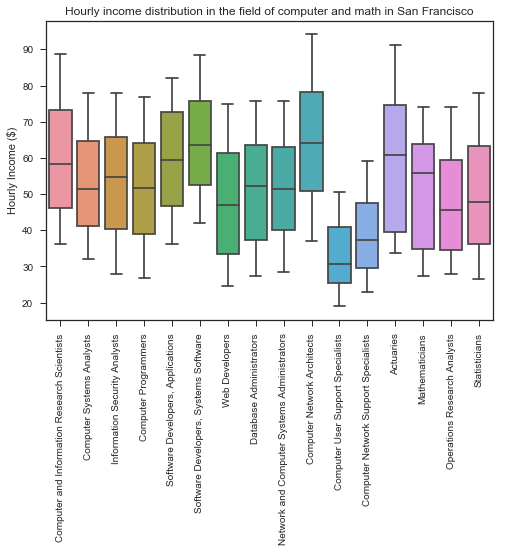

In [113]:
import seaborn as sns
boxplot = sub_new[['H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90']]
boxplot_new=sns.boxplot(boxplot.T)
plt.xticks(rotation=90)
plt.title('Hourly income distribution in the field of computer and math in San Francisco')
plt.xlabel('')
plt.ylabel('Hourly Income ($)')
plt.show()

/Users/michellehung/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


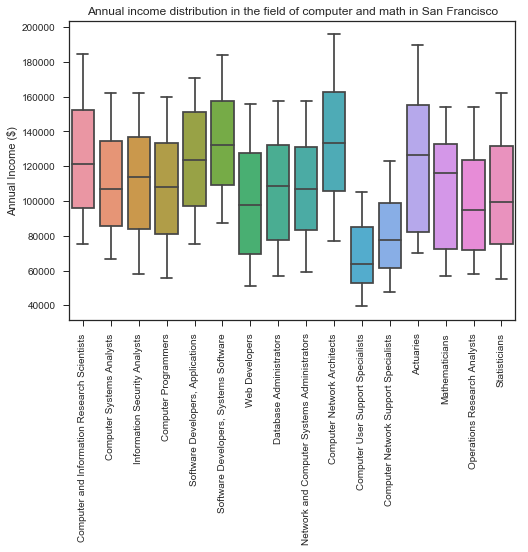

In [112]:
import seaborn as sns
boxplot = sub_new[['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']]
boxplot_new=sns.boxplot(boxplot.T)
plt.xticks(rotation=90)
plt.title('Annual income distribution in the field of computer and math in San Francisco')
plt.ylabel('Annual Income ($)')
plt.xlabel('')
plt.show()